In [1]:
############# Creator: Miao Zheng ##############
## Import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

In [2]:
## Read file using pandas.
data = pd.read_csv('combined_raw_data.csv', header ='infer')

In [3]:
## Check the first few rows of data.
data.head()

,headlines
0,Amazon amp; Tops Q1 2019 Industry Report Ranki...
1,This multicolor LED light strip with app contr...
2,"Warren Buffett impressed by Amazon, But not in..."
3,Potential Amazon Employees May Never Have to L...
4,"Roc Nation, Amazon submit new evidence in lega..."


In [4]:
## See if there is any null values.
data.isnull().any()

headlines    False
dtype: bool

In [5]:
## Remove stopwords from headlines.
from nltk.corpus import stopwords
stop=stopwords.words('english')


data['headlines']=data["headlines"].apply(\
        lambda l:" ".join(w.lower() for w in str(l).split() if w.lower() not in stop))
data['headlines'].head()
## data['headlines'].tail()


0    amazon amp; tops q1 2019 industry report ranki...
1    multicolor led light strip app control somehow...
2    warren buffett impressed amazon, interested bu...
3    potential amazon employees may never leave cry...
4    roc nation, amazon submit new evidence legal b...
Name: headlines, dtype: object

In [12]:
## Remove special characters and punctuations from headlines.
data['headlines']=data['headlines'].str.replace('[^\w\s]','')
data['headlines']=data['headlines'].str.replace('amp',"")
data['headlines']=data['headlines'].str.replace('u00e2u0080u0099s',"")
data['headlines']=data['headlines'].str.replace('u00e2u0080u0099',"")
data['headlines']=data['headlines'].str.replace('u00e2u0080u0093',"")
data['headlines']=data['headlines'].str.replace('u00e2u0080u0094',"")
data['headlines']=data['headlines'].str.replace('u00e2u0080u0092',"")


data['headlines'].head(500)
## data['Headlines'].tail()

0      amazon  tops q1 2019 industry report ranking d...
1      multicolor led light strip app control somehow...
2      warren buffett impressed amazon interested buy...
3      potential amazon employees may never leave cry...
4      roc nation amazon submit new evidence legal ba...
5      ceo vmware implies cloud wars companys heart r...
6                  amazon warehouses far full automation
7      returned amazon item treasure hunthappening we...
8      cinespace chicago film studios welcomes amazon...
9      amazon bows pressure accept cash brickandmorta...
10            avengers endgame available preorder amazon
11                   5 best beauty buys amazon month  25
12     microsoft scott guthrie amazon web services ya...
13     shoppers stop relist products amazon fairfax m...
14     amazon primes markets whole foods delivery add...
15     messy breakup new york amazon back cashierless...
16     samsung galaxy m20 gets cheaper amazon summer ...
17               amazon open fi

In [13]:
# Tokenize headlines.
from nltk.tokenize import sent_tokenize, word_tokenize

data_Headline=data['headlines'].apply(word_tokenize)
# data_headlines.head()
all_words = []
for line in data_Headline:
  all_words += line




In [15]:
# Combine tokenized words into string
all_words_str = ' '.join(word for word in all_words)

print(all_words_str)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
# word frequency
df = pd.Series(word for word in all_words)
value = df.value_counts(dropna=True, sort=True)
df = value.rename_axis('unique_words').reset_index(name='counts')[:50]
print(df)
# df.value_counts() 

   unique_words  counts
0        google   17934
1        amazon   13370
2         pixel    2946
3           new    2683
4            3a    2251
5        market    2102
6          2019    1973
7       android    1572
8     assistant    1269
9            io    1019
10        apple    1007
11           us     897
12           xl     897
13     facebook     895
14    microsoft     856
15         says     833
16         home     821
17       search     812
18        prime     811
19          top     801
20          key     795
21          may     774
22          get     768
23       global     767
24         best     753
25        smart     752
26       huawei     743
27      players     742
28        india     735
29         data     723
30     services     719
31        alexa     694
32        cloud     679
33        price     677
34         play     668
35          inc     665
36     delivery     659
37       growth     657
38         tech     647
39     business     644
40            3 

AxesSubplot(0.125,0.125;0.775x0.755)


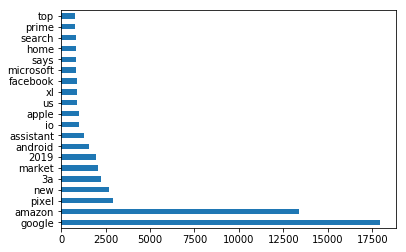

In [18]:
# plot count of top 20 words
plot = value[:20].plot(kind='barh')
print(plot)

In [ ]:
# Look at class distribution
#class_dist = data['relevancy'].value_counts()
#print(class_dist)

In [ ]:
# Pie chart for class distribution
labels = ('Relevant: 1', 'Irrelevant: 0')
sizes = (2752, 1484)
colors = ('lightcoral', 'lightskyblue')
explode = (0.1, 0) 
plt.pie(sizes, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=140)


In [21]:

# generating the word cloud
word_cloud = WordCloud(stopwords=STOPWORDS,max_words=500,
                      background_color='white',width=3000,
                      collocations=False,min_font_size=6,
                      height=3000
                     ).generate(all_words_str)

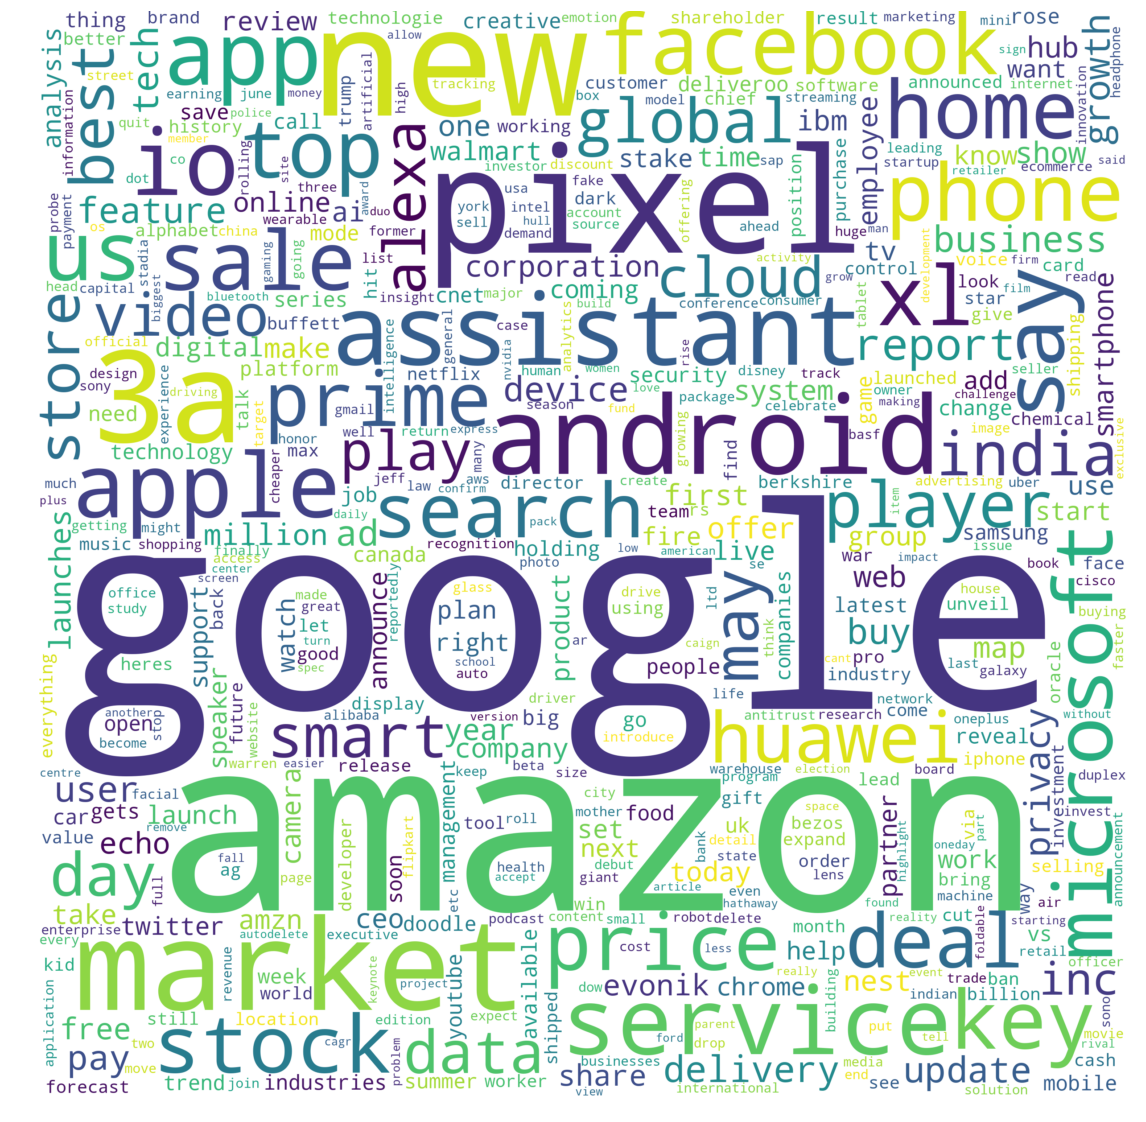

In [22]:
# Plot word cloud
plt.figure(1,figsize=(20, 20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()